In [ ]:
%matplotlib inline 
#to include graphs next to the code
#useful libraries
import numpy as np #linear algebra
import math
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualization


file='combined_csv_3dim.csv'
data3 = pd.read_csv(file)


#get the overview of the data


print(data3.describe()) #statistics 

       totalTravelTimeInSec  ...  totalWaitingTime
count          92229.000000  ...      92229.000000
mean          197502.622841  ...     186403.156328
std           382265.843976  ...     387461.940713
min              424.000000  ...          0.000000
25%             9891.000000  ...          0.000000
50%            16091.000000  ...          0.000000
75%            30249.000000  ...       6948.000000
max           999999.000000  ...     999999.000000

[8 rows x 5 columns]


In [ ]:
#select rows with the specific values
data3[(data3 == 999999.0).any(axis=1)]


,totalTravelTimeInSec,totalPrice,totalNumberOfChanges,totalWalkingDistance,totalWaitingTime,objective,finiteAutomaton,consideredPreferences,finalSolutionUsedLabels,sourceName,targetName
12,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
22,999999.0,999999.0,999999,999999.0,999999,numberofChanges,ptOnly,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
37,999999.0,999999.0,999999,999999.0,999999,numberofChanges,noFlights,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
41,999999.0,999999.0,999999,999999.0,999999,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[blablacar],Hamburg,Würzburg
51,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
92218,999999.0,999999.0,999999,999999.0,999999,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92223,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92226,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
92227,999999.0,999999.0,999999,999999.0,999999,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],Würzburg,Oberhausen


3 dimensional dataset has 17048 rows with the unreal values of 999999.0

In [ ]:
for c in data3:
    print(data3[c].unique())
    print(data3[c].nunique())

[14400. 18300. 21643. ... 16522. 22080. 27198.]
2676
[159.5729972  106.66969339  26.         ...  85.79963198 108.44789322
 109.45803673]
3654
[     0 999999      1      2      3      4      7      5]
8
[0.00000000e+00 9.99999000e+05 6.04486783e-02 3.05347513e-01
 4.15018720e-01 4.84844618e-01 6.02814987e-01 8.38771887e-01
 4.50467200e-01 1.18120831e-01 3.54077731e-01 2.14510299e-01
 2.88175428e-01 4.66333439e-01 5.40945201e-01 8.40202310e-02
 7.16546025e-02 5.14118875e-01 3.53583043e-01 3.65948671e-01
 4.07756666e-01 1.25828225e-01 4.14100041e-01 3.40389879e-01
 4.20194123e-01 1.13207893e-01 3.79003625e-01 3.13785411e-01
 3.68008128e-01 1.76304340e-01 1.41157676e-01 1.91048642e-01
 2.73794816e-01 2.00978767e-01 4.88520914e-01 3.59570231e-01
 2.99749140e-01 1.99538620e-01 3.02761736e-01 2.83967859e-01
 4.71050779e-01 4.32386280e-01 3.78163562e-01 4.54792472e-01
 2.62531420e-01 2.42940645e-01 2.54481612e-01 2.79636401e-01
 2.85730483e-01 2.62914567e-01 1.85721160e-01 1.73190272e-01
 4.7

Lamost same unique categories as per 2 dim dataset- objective, preferences (except price and time),
destinations, but less unique values wrt to silution labels

In [ ]:
search= data3.query('totalPrice in [999999.0]')#create a subdataset with abnormal values
search

,totalTravelTimeInSec,totalPrice,totalNumberOfChanges,totalWalkingDistance,totalWaitingTime,objective,finiteAutomaton,consideredPreferences,finalSolutionUsedLabels,sourceName,targetName
12,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
22,999999.0,999999.0,999999,999999.0,999999,numberofChanges,ptOnly,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
37,999999.0,999999.0,999999,999999.0,999999,numberofChanges,noFlights,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
41,999999.0,999999.0,999999,999999.0,999999,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[blablacar],Hamburg,Würzburg
51,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
92218,999999.0,999999.0,999999,999999.0,999999,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92223,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92226,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
92227,999999.0,999999.0,999999,999999.0,999999,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],Würzburg,Oberhausen


In [ ]:
for col in search: #search for unique and abnormal patterns
    print(search[col].unique())
    print(search[col].nunique())

[999999.]
1
[999999.]
1
[999999]
1
[999999.]
1
[999999]
1
['numberofChanges' 'travelTime' 'walkingDistance' 'waitingTime' 'price']
5
['all' 'ptOnly' 'noFlights']
3
['[travelTime, price, numberofChanges]'
 '[travelTime, price, numberofChanges, walkingDistance]'
 '[travelTime, price, numberofChanges, walkingDistance, waitingTime]']
3
['[db_fv]' '[blablacar]' '[flixbus, db_fv]' '[db_fv, flixbus]' '[flixbus]'
 '[db_fv, blablacar]' '[flixbus, blablacar]'
 '[db_fv, flixbus, db_fv, flixbus]' '[db_fv, flixbus, db_fv]'
 '[blablacar, db_fv]' '[db_fv, blablacar, db_fv]'
 '[db_fv, blablacar, flixbus]' '[car]'
 '[db_fv, blablacar, flixbus, db_fv]' '[blablacar, flixbus, db_fv]'
 '[blablacar, db_fv, flixbus, db_fv]' '[blablacar, flixbus]'
 '[blablacar, db_fv, flixbus]' '[flixbus, blablacar, flixbus]'
 '[flixbus, db_fv, flixbus]' '[flixbus, db_fv, blablacar]'
 '[db_fv, flixbus, blablacar]' '[flixbus, blablacar, db_fv]'
 '[flixbus, flight, db_fv]' '[db_fv, flixbus, db_fv, flixbus, db_fv]'
 '[db_fv, bla

To conclude,no special pattern,typical for all objectives,mode choices,all combinations of labels and preferences (-1) as in the big 3 dim dataset

In [ ]:
#drop abnormal rows
data3.drop(data3[data3.totalTravelTimeInSec == 999999.0].index, inplace=True)
data3

,totalTravelTimeInSec,totalPrice,totalNumberOfChanges,totalWalkingDistance,totalWaitingTime,objective,finiteAutomaton,consideredPreferences,finalSolutionUsedLabels,sourceName,targetName
0,14400.0,159.572997,0,0.000000,0,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,18300.0,106.669693,0,0.000000,0,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,21643.0,26.000000,0,0.000000,0,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,21643.0,26.000000,0,0.000000,0,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,18300.0,106.669693,0,0.000000,0,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
92220,13200.0,103.627142,1,0.000000,180,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
92221,16342.0,22.466778,1,0.176952,916,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92222,16522.0,21.850084,1,0.176952,1096,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92224,13020.0,109.023555,1,0.000000,240,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
# saving the newest dataframe
import os

working_directory = os.getcwd()
print (working_directory)

/content


In [ ]:
#get the file without 999999 values

import csv
import os.path

userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'data.csv')
open(csvfile, "r")

path = working_directory + '/Desktop/combined_csv_3dim.csv'
data3 = pd.read_csv(path)
data3.head()

import csv


userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'newcombined_csv_3dim.csv')


data3.to_csv(csvfile, encoding='utf-8',index=False)

FileNotFoundError: ignored

In [ ]:
pip install datacompy #library for comparison

  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=55fb9ad3eaeb273f33cd32f56fcd6ce162f48c8d7cdfc50886660517a9e73a72
  Stored in directory: /root/.cache/pip/wheels/73/2b/f6/26e9f84153c25050fe7c09e88f8e32a6be3c7034a38c418319
Successfully built ordered-set


In [ ]:
from io import StringIO
import datacompy

In [ ]:
#used 2 files for comparison
df1 = pd.read_csv('combined_csv_2dim.csv') #2 dim dataset
df2 = pd.read_csv('newcombined_csv_3dim.csv') #reduced by 999999 values 3 dim dataset

In [ ]:
#obtain the insights about the similarities in 2 datasets per rows and columns
#join with the list of all columns to compare the combinations

compare = datacompy.Compare(
df1,
df2,
join_columns= ['totalTravelTimeInSec',	'totalPrice',	'totalNumberOfChanges',	'totalWalkingDistance',	'totalWaitingTime',	'objective',	'finiteAutomaton',	'consideredPreferences',	'finalSolutionUsedLabels','sourceName', 'targetName'],

abs_tol=0,
rel_tol=0,
df1_name='2dimensions',
df2_name='3dimensions')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

     DataFrame  Columns   Rows
0  2dimensions       11  63069
1  3dimensions       11  75181

Column Summary
--------------

Number of columns in common: 11
Number of columns in 2dimensions but not in 3dimensions: 0
Number of columns in 3dimensions but not in 2dimensions: 0

Row Summary
-----------

Matched on: totaltraveltimeinsec, totalprice, totalnumberofchanges, totalwalkingdistance, totalwaitingtime, objective, finiteautomaton, consideredpreferences, finalsolutionusedlabels, sourcename, targetname
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 45,857
Number of rows in 2dimensions but not in 3dimensions: 17,212
Number of rows in 3dimensions but not in 2dimensions: 29,324

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 45,857

Column Comparison
-----------------

Number of columns compared with

Number of common rows are 45857 (identical)

In [ ]:
# transform seconds to hours for plotting
def transform_values(d):
  d['totaltraveltimeinsec'] = d['totaltraveltimeinsec'].div(3600).round(2) #round to 2 digits after the decimal point
  d['totalwaitingtime'] = d['totalwaitingtime'].div(3600).round(2)

  return d

df1 = transform_values(df1)
df1

df2 = transform_values(df2)
df2

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,4.00,159.572997,0,0.000000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,5.08,106.669693,0,0.000000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,6.01,26.000000,0,0.000000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,6.01,26.000000,0,0.000000,0.00,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,5.08,106.669693,0,0.000000,0.00,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
75176,3.67,103.627142,1,0.000000,0.05,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,4.54,22.466778,1,0.176952,0.25,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,4.59,21.850084,1,0.176952,0.30,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,3.62,109.023555,1,0.000000,0.07,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
data_3 = df2.iloc[:10]
  
# printing first 10 of the column
print(data_3)

   totaltraveltimeinsec  totalprice  ...  sourcename  targetname
0                  4.00  159.572997  ...     Hamburg    Würzburg
1                  5.08  106.669693  ...     Hamburg    Würzburg
2                  6.01   26.000000  ...     Hamburg    Würzburg
3                  6.01   26.000000  ...     Hamburg    Würzburg
4                  5.08  106.669693  ...     Hamburg    Würzburg
5                  4.02  159.572997  ...     Hamburg    Würzburg
6                  4.00  159.572997  ...     Hamburg    Würzburg
7                  5.97  152.430459  ...     Hamburg    Würzburg
8                  5.08  106.669693  ...     Hamburg    Würzburg
9                  6.01   26.000000  ...     Hamburg    Würzburg

[10 rows x 11 columns]


In [ ]:
#round 'price' and 'distance' to 2 digits
def round(d):
  d=d.round({'totalwalkingdistance': 3, 'totalprice': 2})
  return d

df1 = round(df1)
df1

df2 = round(df2)
df2

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,4.00,159.57,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,5.08,106.67,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,6.01,26.00,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,6.01,26.00,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,5.08,106.67,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
75176,3.67,103.63,1,0.000,0.05,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,4.54,22.47,1,0.177,0.25,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,4.59,21.85,1,0.177,0.30,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,3.62,109.02,1,0.000,0.07,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


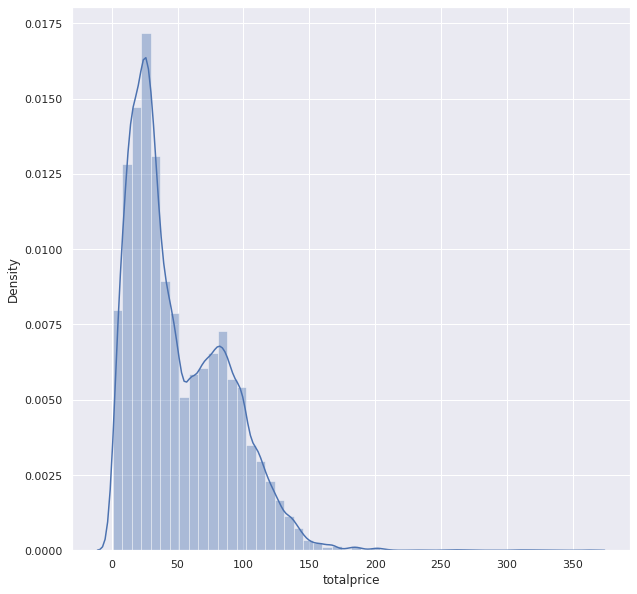

In [ ]:
#have a look at the total price distribution
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df2['totalprice'], color='b')

3 dim dataset - the data is skewed, the price distribution is not normally distributed,  the majority of prices has a value between 14 and 35 euros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


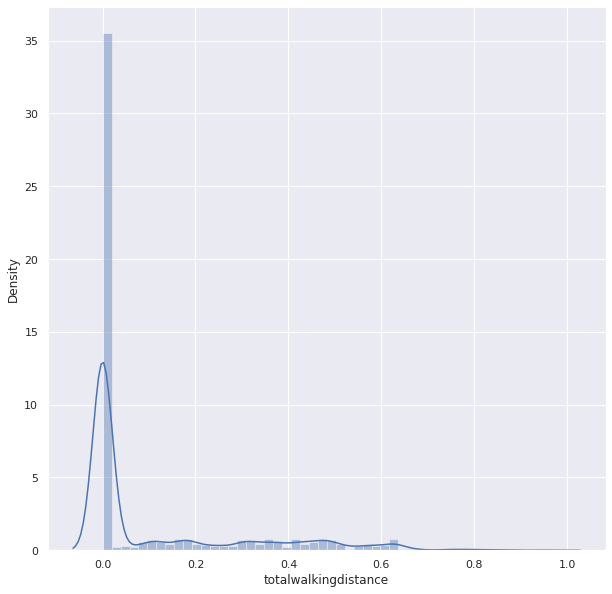

In [ ]:
#have a look at the total walking distance distribution

sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df1['totalwalkingdistance'], color='b')


2-dim dataset, the data is skewed, a lot of 0 values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


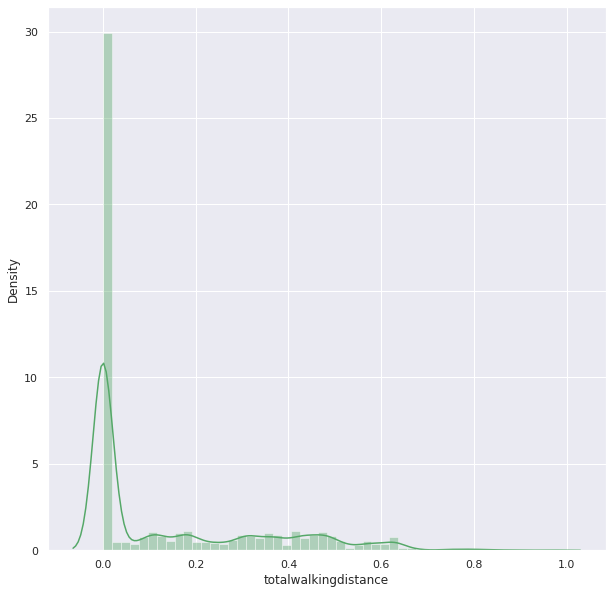

In [ ]:
#have a look at the total walking distance distribution

sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) # size
sns.distplot(df2['totalwalkingdistance'], color='g')

many 0s, the same patter as per 2 dim datatset in 3 dim dataset wrt to 0 values, up to 1 km


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


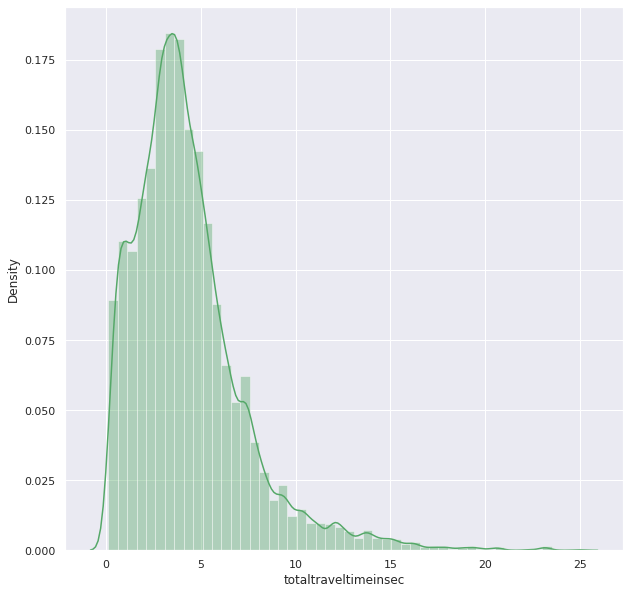

In [ ]:
#have a look at the total travel time distribution

sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #size
sns.distplot(df2['totaltraveltimeinsec'], color='g')


The most dense area is within 25-35 hours

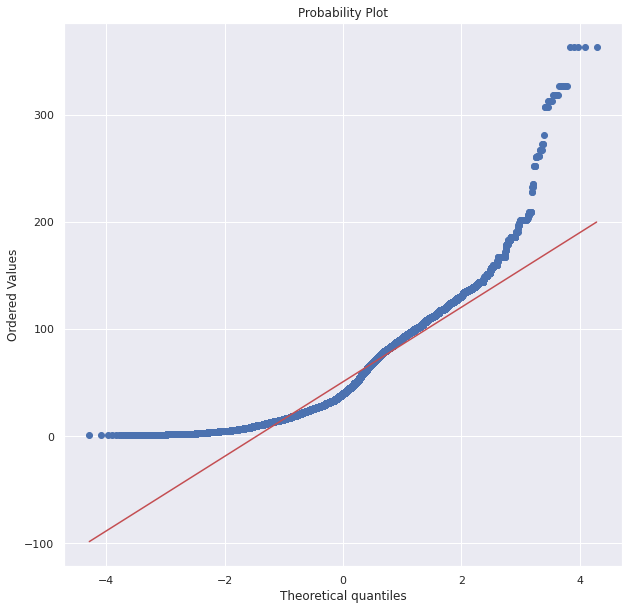

In [ ]:
#usage of qq plots
import numpy as np 
import pylab 
import scipy.stats as stats
plt.figure(figsize=(10,10))
plt.title('Distribution of prices ',fontsize=15)
measurements = df2['totalprice']  
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

Based on 3 dim dataset pattern, since the data is not normally distributed, we can't perform T-test, we shoud use Mann-Whitney U test, which doesnt assume any specific distribution

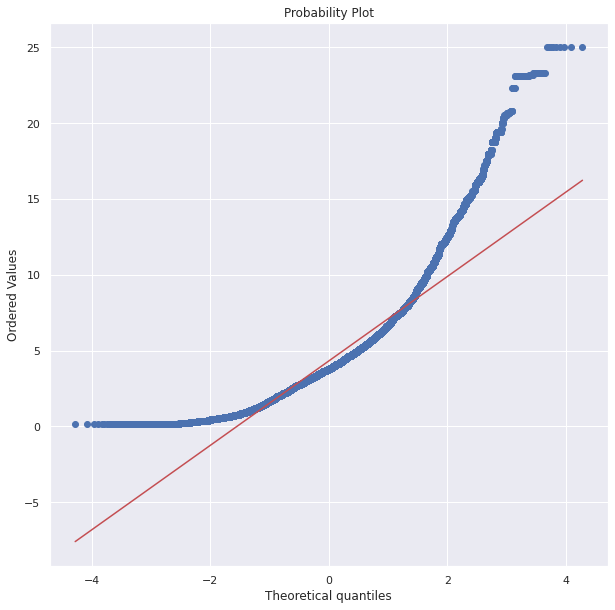

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Distribution of travel time ',fontsize=15)
measurements = df2['totaltraveltimeinsec']  
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

Proved for time column as well with the distribution (dark blue line is not following the red line)

In [ ]:
# try to get sample from df2 that df2=df1
df2s= df2['totalwalkingdistance'].sample(n=63000, random_state=1)#set the fixed seed
df2s

46932    0.000
74285    0.387
64944    0.000
25834    0.000
21381    0.000
         ...  
16329    0.000
25022    0.000
56564    0.178
65532    0.000
4215     0.303
Name: totalwalkingdistance, Length: 63000, dtype: float64

We have 63069 rows in 2 dim datatset, for comparison we need to use the datatsets with the same sizes

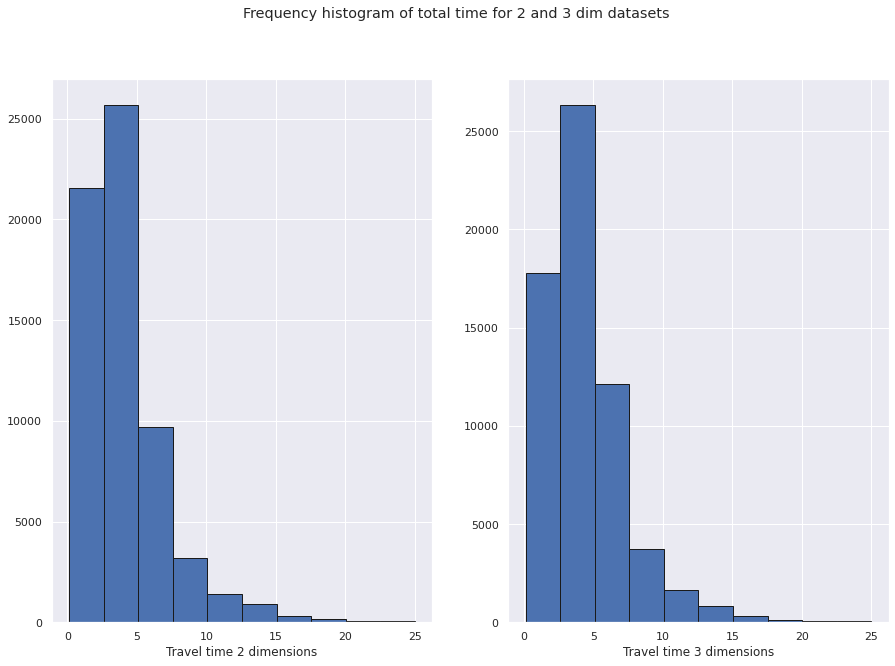

In [ ]:
#plot frequency histograms
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Frequency histogram of total time for 2 and 3 dim datasets')
ax1.hist(df1['totaltraveltimeinsec'], bins=10, histtype='bar', ec='k') 
ax2.hist(df2['totaltraveltimeinsec'].sample(n=63069, random_state=1), bins=10, histtype='bar', ec='k') #get the sample of n=63069 as in 2 dim dataset
ax1.set_xlabel("Travel time 2 dimensions")
ax2.set_xlabel("Travel time 3 dimensions")
plt.show()

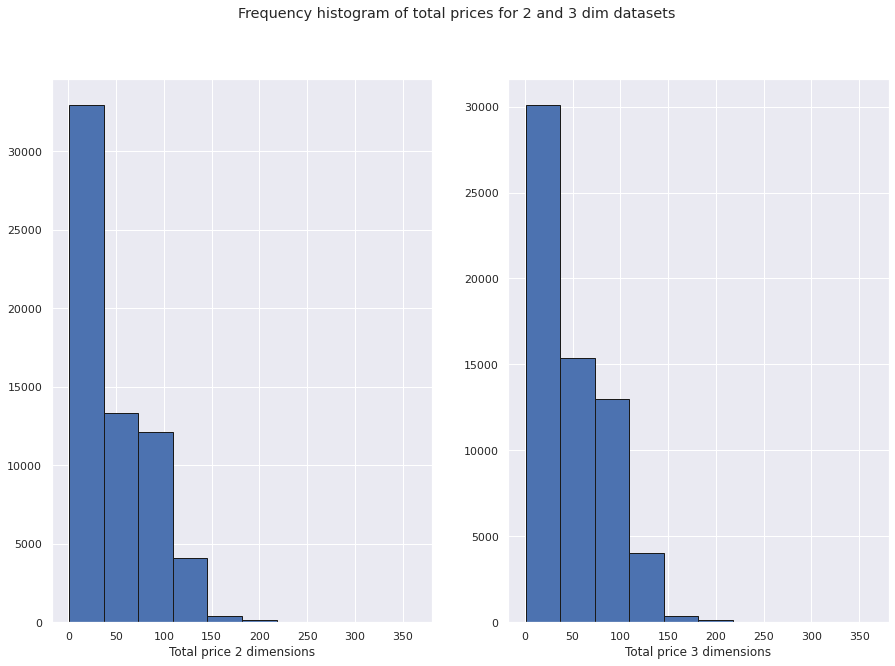

In [ ]:
#plot frequency histograns for the price
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Frequency histogram of total prices for 2 and 3 dim datasets')
ax1.hist(df1['totalprice'], bins=10, histtype='bar', ec='k') 
ax2.hist(df2['totalprice'].sample(n=63069, random_state=1), bins=10, histtype='bar', ec='k') # make the sizes of the datasets identical
ax1.set_xlabel("Total price 2 dimensions")
ax2.set_xlabel("Total price 3 dimensions")
plt.show()

In [ ]:
import scipy.stats as stats
#conduct the test
w, pvalue = stats.shapiro(df1['totalprice'].sample(n=200, random_state=1))# sample up to 200
w, pvalue


(0.899763286113739, 2.427241740932118e-10)

As the p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we sum up again that the data is not normally distributed

In [ ]:
w, pvalue = stats.shapiro(df2['totalprice'].sample(n=200, random_state=1))# sample up to 200
w, pvalue


(0.9250867962837219, 1.3982589308625393e-08)

Same pattern for the 3 dim dataset

In [ ]:
#conduct the Mann Whitney U test - check (price)

stats.mannwhitneyu(x=df1['totalprice'], y=df2['totalprice'].sample(n=63069, random_state=1), alternative = 'greater')

MannwhitneyuResult(statistic=1884880760.5, pvalue=1.0)

Significance level = 0.05 ,indicates a 5% risk of concluding that a difference exists when there is no actual difference, as the p value obtained from the Mann-Whitney U test is not significant (p > 0.05), we conclude that the total price of the data set 1 is not significantly greater than the total price from data set 2


In [ ]:
#significance level =0.05 ,indicates a 5% risk of concluding that a difference exists when there is no actual difference
#as the p value obtained from the Mann-Whitney U test is not significant (p > 0.05), we conclude that the total travel time of the data set 1 is not significantly greater than the total travel time distribution from data set 2
# if sample size is too big, p value could not be exact enough
stats.mannwhitneyu(x=df1['totaltraveltimeinsec'], y=df2['totaltraveltimeinsec'].sample(n=63069, random_state=1), alternative = 'greater')

MannwhitneyuResult(statistic=1823548562.5, pvalue=1.0)

Same conclusion, as the p value obtained from the Mann-Whitney U test is not significant (p > 0.05), the total travel time of the data set 1 is not significantly greater than the total travel time distribution from data set 2,but if sample size is too big, p value could not be exact enough

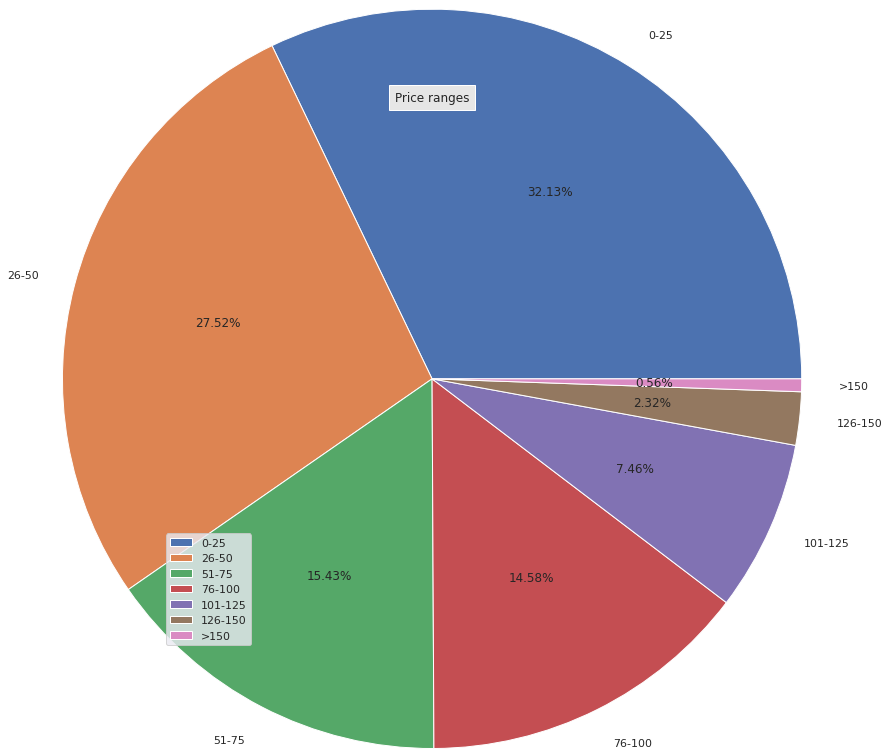

50.09193812266397

In [ ]:
#investigate data via other plots (differences for 3 dim) before the final merging

#price binning for 3 dim (also checked for 2 dim)
data_price3 = df2[:] #slice for every element
data_price3["totalprice"] = data_price3["totalprice"].astype(int) #specify the column and dtype we need
bins = [0,25,50,75,100,125,150,200] #create a list of bins
labels = ['0-25','26-50','51-75','76-100','101-125', '126-150', '>150'] #create the list of labels
data_price3['totalprice_cat'] = pd.cut(data_price3["totalprice"], bins=bins, labels=labels) #bin values into discrete intervals
data_price3.head()
plt.figure(figsize=(10,10)) 

#count and enter percentages inside the shape
plt.pie(data_price3['totalprice_cat'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.7)#parametres
plt.legend(loc="lower left") #location of the figure
plt.title("Price ranges", bbox={'facecolor':'0.9', 'pad':6}, loc = "center")#play with the title
plt.show()


data_price3["totalprice"].mean()


On average the price would be 50 euros,the most common range for price in dataset3 is also below 25 euros as in 2 dim

Text(0.5, 1.0, 'Correlation between price and travel time')

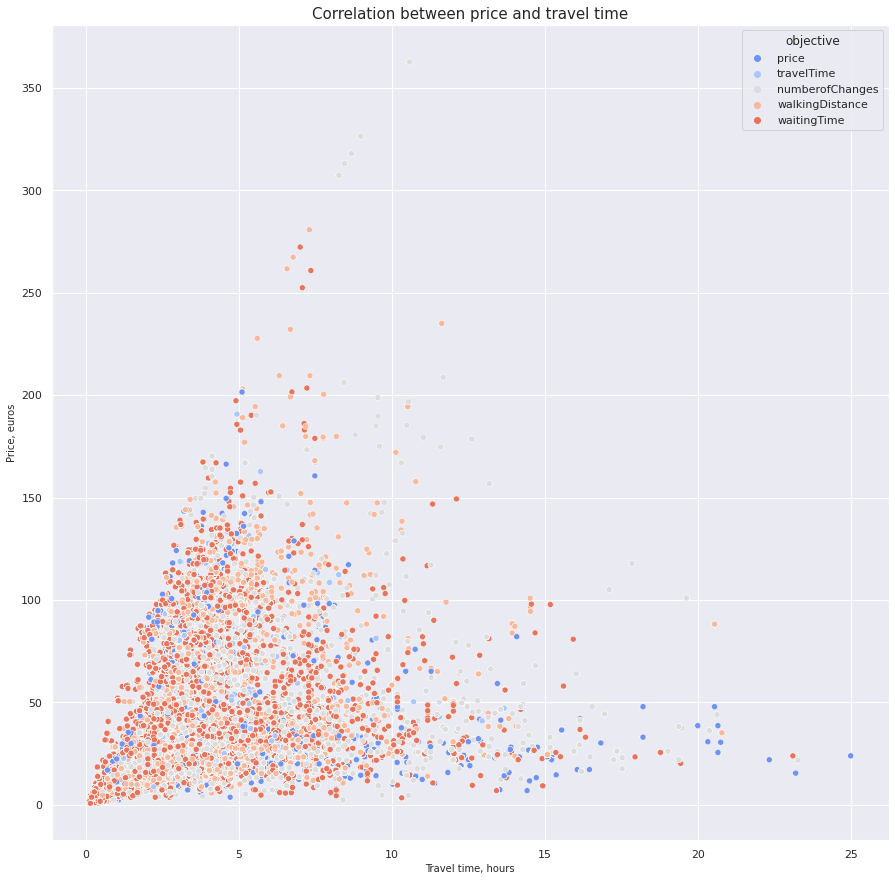

In [ ]:
#draw a scatter plot
import matplotlib as mpl
plt.figure(figsize=(15, 15))
sns.scatterplot(
    data=df4,
    x="totaltraveltimeinsec", y="totalprice",hue="objective", #specify the axes
     palette= "coolwarm",
)
plt.xlabel("Travel time, hours", size = 10)
plt.ylabel("Price, euros", size = 10)
plt.title("Correlation between price and travel time", size = 15)

Absolutely the same pattern, final solutions are different (new unique combinations based on considered preferences),a scatter plot price per travel time in general, hard to interpret, further checks per source and target, separate groups via clustering , per transport mode would be needed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


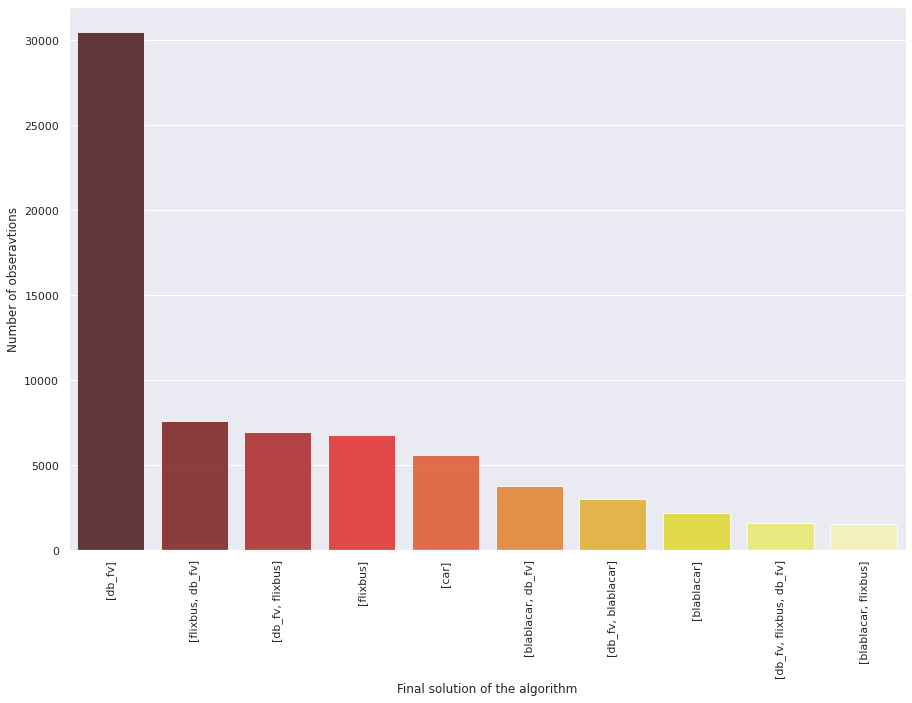

In [ ]:
# Plot Top 10 combinations based on number of observations

cnt_srs = df2['finalsolutionusedlabels'].value_counts().nlargest(10)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Final solution of the algorithm', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

The lead combination is the same as in 2dim, the second one proposed option is different in comparison to 2dim dataset, the most common one (suitable for many routes)- train

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


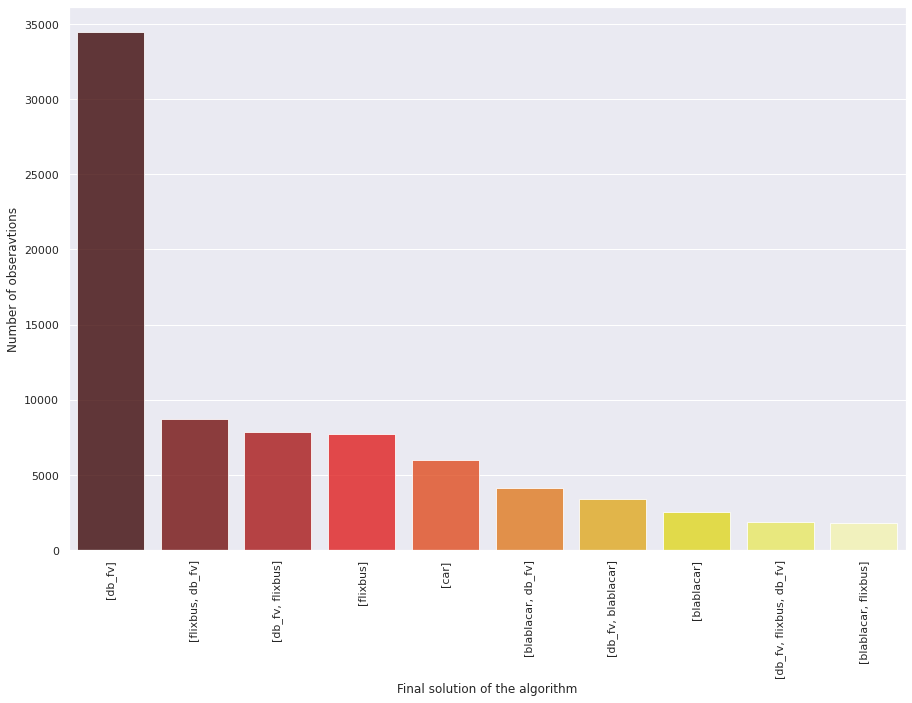

In [ ]:
# Plot Top 10 combinations based on number of observations for combined

cnt_srs = df4['finalsolutionusedlabels'].value_counts().nlargest(10) #df4-combined dataset
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Final solution of the algorithm', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

Train is the most common solution label

Text(0.5, 1.0, 'Distribution of prices per number of changes ')

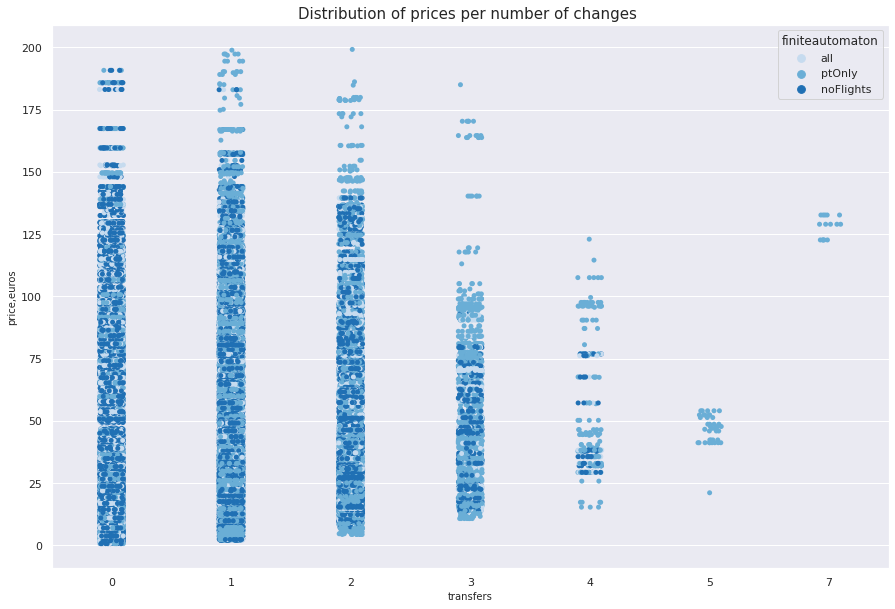

In [ ]:
#investigate deeper the transfer distribution when the price is less than 200 euros
#for 3 dim dataset

plt.figure(figsize=(15, 10))
sns.stripplot(data=df2,x=df2.totalnumberofchanges[df2['totalprice']<200]#set an interval
              ,y='totalprice', hue="finiteautomaton",palette='Blues') #configure the axis
plt.xlabel("transfers", size = 10)
plt.ylabel("price,euros", size = 10)
plt.title('Distribution of prices per number of changes ',fontsize=15)


Found out that the price is slightly higher having 1 transfer than 0 (includes 0 and null),2 and 3, but all of them are higher than having  4,5 and 7. For 0 transfers (ncluding Nan) the mode of noFlights is dominative one, especially when the price is high, for 1-7 transfers higher price relates to public transport choice mostly

In [ ]:
#get the label combinations for 2 dim
uniqueValues = df1['finalsolutionusedlabels'].unique()
uniqueValues

array(['[flixbus]', '[db_fv]', '[car]', '[blablacar, db_fv]',
       '[flixbus, db_fv]', '[db_fv, flixbus]',
       '[db_fv, flixbus, blablacar]', '[db_fv, flixbus, db_fv]',
       '[db_fv, blablacar]', '[db_fv, blablacar, db_fv]',
       '[flixbus, blablacar, db_fv]', '[blablacar]',
       '[db_fv, blablacar, flixbus]',
       '[db_fv, blablacar, flixbus, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus]', '[blablacar, flixbus]',
       '[blablacar, db_fv, flixbus]', '[blablacar, flixbus, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus, db_fv]',
       '[flixbus, db_fv, flixbus, db_fv]', '[flixbus, flight, db_fv]',
       '[flixbus, blablacar]', '[flixbus, db_fv, flixbus]',
       '[flixbus, blablacar, flixbus]',
       '[flixbus, flight, db_fv, flixbus]',
       '[db_fv, flixbus, blablacar, flixbus]',
       '[flixbus, flight, flixbus]',
       '[flixbus, blablacar, db_fv, flixbus]',
       '[flixbus, db_fv, blablacar]',
       '[flixbus, blablacar, flixbus, db_fv]',
       '[db_fv,

In [ ]:
#for 3 dim
uniqueValues1 = df2['finalsolutionusedlabels'].unique()
uniqueValues1

array(['[db_fv]', '[blablacar]', '[car]', '[flixbus, db_fv]',
       '[db_fv, flixbus]', '[flixbus]', '[db_fv, blablacar]',
       '[flixbus, blablacar]', '[db_fv, flixbus, db_fv, flixbus]',
       '[db_fv, flixbus, db_fv]', '[blablacar, db_fv]',
       '[db_fv, blablacar, db_fv]', '[db_fv, blablacar, flixbus]',
       '[db_fv, blablacar, flixbus, db_fv]',
       '[blablacar, db_fv, flixbus, db_fv]',
       '[blablacar, flixbus, db_fv]', '[blablacar, flixbus]',
       '[blablacar, db_fv, flixbus]', '[flixbus, blablacar, flixbus]',
       '[flixbus, db_fv, flixbus]', '[flixbus, db_fv, blablacar]',
       '[db_fv, flixbus, blablacar]', '[flixbus, blablacar, db_fv]',
       '[flixbus, flight, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus, db_fv]',
       '[flixbus, db_fv, flixbus, db_fv]',
       '[db_fv, blablacar, db_fv, flixbus]'], dtype=object)

In [ ]:
#check the exact difference
np.setdiff1d(uniqueValues,uniqueValues1)

array(['[db_fv, flight, flixbus, db_fv]',
       '[db_fv, flixbus, blablacar, flixbus]',
       '[flixbus, blablacar, db_fv, flixbus]',
       '[flixbus, blablacar, flixbus, db_fv]',
       '[flixbus, flight, db_fv, flixbus]', '[flixbus, flight, flixbus]'],
      dtype=object)

+6 additional combinations in 2 dim in comparison to 3 dim dataset

In [ ]:
#check the availability of new unique combinations
np.setdiff1d(uniqueValues1,uniqueValues)

array([], dtype=object)

Do not have any new unique solutions themselves in 3 dim versus 2 dim

In [ ]:
#combine 2 datasets
frames = [df1, df2]
df3 = pd.concat(frames)
df3

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
...,...,...,...,...,...,...,...,...,...,...,...
75176,3.67,103.63,1,0.000,0.05,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,4.54,22.47,1,0.177,0.25,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,4.59,21.85,1,0.177,0.30,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,3.62,109.02,1,0.000,0.07,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
#for reducing the duplicates
df4=df3.copy()
df4

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
...,...,...,...,...,...,...,...,...,...,...,...
75176,3.67,103.63,1,0.000,0.05,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,4.54,22.47,1,0.177,0.25,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,4.59,21.85,1,0.177,0.30,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,3.62,109.02,1,0.000,0.07,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
#determine the duplicated rows
df4.duplicated(subset=['totaltraveltimeinsec',	'totalprice',	'totalnumberofchanges',	'totalwalkingdistance',	'totalwaitingtime',	'objective',	'finiteautomaton',	'consideredpreferences',	'finalsolutionusedlabels','sourcename', 'targetname']).sum()

53097

-53097 duplicates after merging

In [ ]:
#again check the sum without specifing the column
df4.duplicated().sum()

53097

In [ ]:
# first line will be identified as the true line, other lines would be the duplicates, to keep the first distinct value
df4.loc[df4.duplicated(keep='first'), :]

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
55347,1.47,18.59,2,0.000,0.00,travelTime,ptOnly,"[travelTime, price, numberofChanges]",[db_fv],Oberhausen,Hagen
55369,1.47,18.59,2,0.000,0.00,travelTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Oberhausen,Hagen
0,4.00,159.57,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,5.08,106.67,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,6.01,26.00,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
75176,3.67,103.63,1,0.000,0.05,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,4.54,22.47,1,0.177,0.25,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,4.59,21.85,1,0.177,0.30,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,3.62,109.02,1,0.000,0.07,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [ ]:
#the duplicated were removed
df4.drop_duplicates(keep='first', inplace=True)

In [ ]:
#new appropriate index
df4.reset_index(inplace=True)

In [ ]:
#check new ds
df4

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
...,...,...,...,...,...,...,...,...,...,...,...,...
85148,75149,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
85149,75150,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
85150,75166,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
85151,75173,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen


New dataset has 85153 rows

In [ ]:
#check what combinations we have
nnn = df4['consideredpreferences'].unique()
nnn

array(['[travelTime, price]', '[travelTime, price, numberofChanges]',
       '[travelTime, price, numberofChanges, walkingDistance]',
       '[travelTime, price, numberofChanges, walkingDistance, waitingTime]'],
      dtype=object)

In [ ]:
#download the new file for further usage and sharing with the team
from google.colab import files
df5.to_csv('withcolumns.csv') 
files.download('withcolumns.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'The top 20 most proposed labels versus mean price')

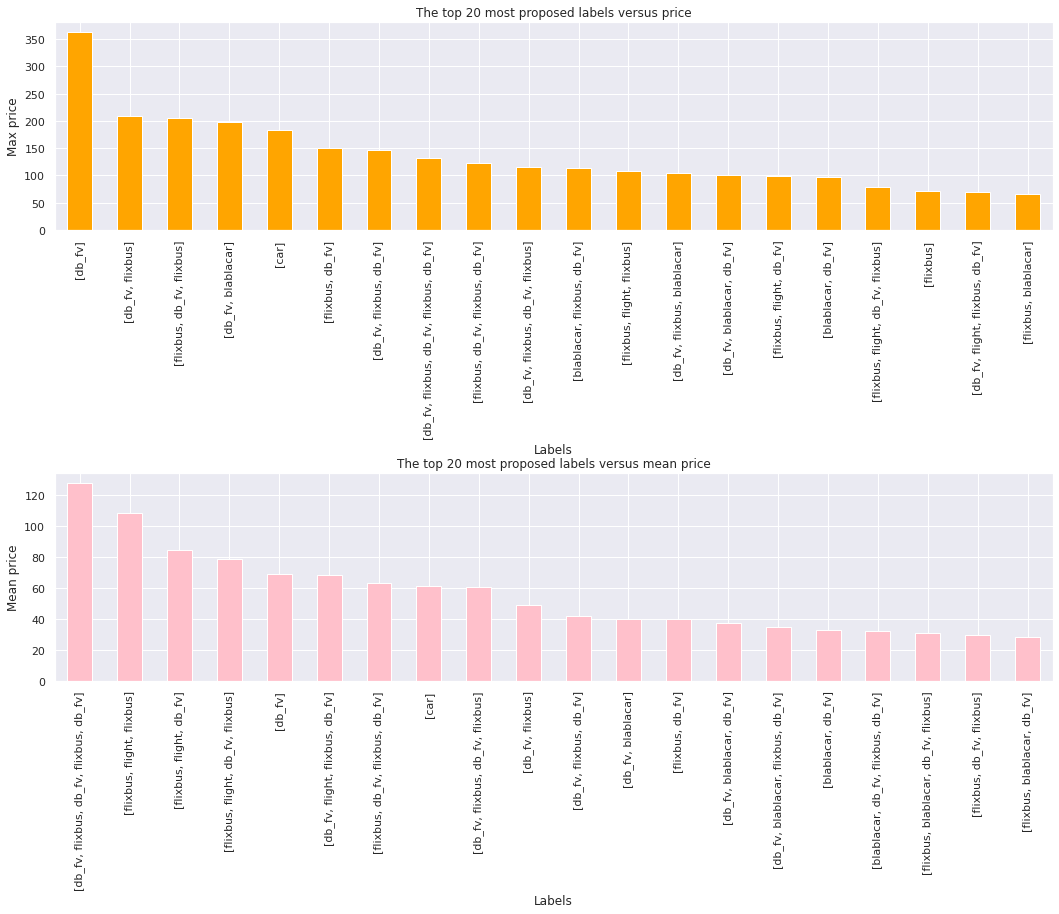

In [ ]:
#display the top 20 labels by max price 
most_popular_labels=df4.groupby("finalsolutionusedlabels")["totalprice"].agg("max").sort_values(ascending=False).head(20)#merged ds
most_popular_labels

fig, axes = plt.subplots(2,1,figsize=(15,10))


plt.subplot(211)
most_popular_labels.plot(kind='bar',color='orange')#set up inner parametres
plt.xlabel("Labels", size = 12)
plt.ylabel("Max price", size =12)
plt.title("The top 20 most proposed labels versus price", size = 12)

plt.tight_layout() #space

plt.subplot(212)
mean_modes = df4.groupby("finalsolutionusedlabels")["totalprice"].agg("mean").sort_values(ascending=False).head(20) #group by aggregated mean in descending order
mean_modes.sort_values(ascending=False).plot(kind = "bar",color='pink') #sort the values in descending order
plt.xlabel("Labels", size = 12)
plt.ylabel("Mean price", size = 12)
plt.title("The top 20 most proposed labels versus mean price", size = 12)

1st graph-visually checked that the top 3 popular labels are train, train+bus, bus+train+bus

2d plot-the ranking of labels have changed when using mean price, the top 3 became train+bus+train+bus+train, bus+flight+bus, bus+flight+train

Text(0.5, 1.0, 'The top 20 most proposed labels versus min travel time in hours')

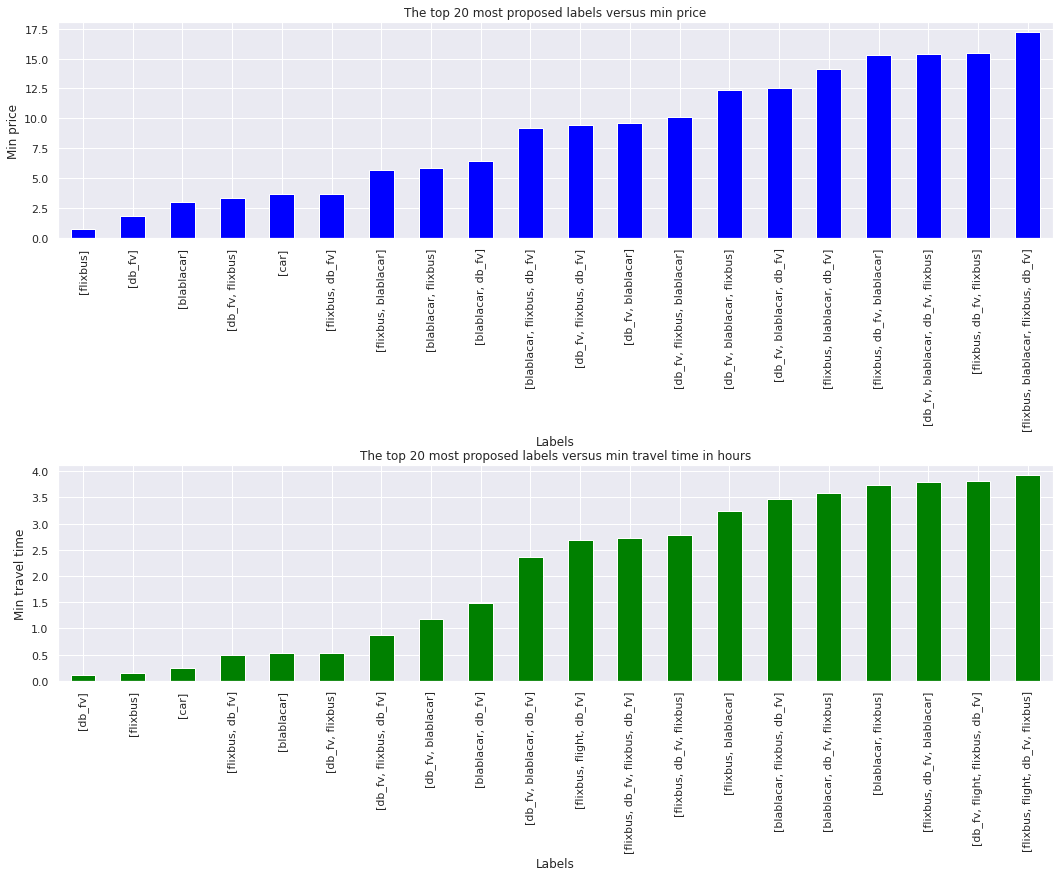

In [ ]:
#display the top twenty labels by min price 
most_popular_labels=df4.groupby("finalsolutionusedlabels")["totalprice"].agg("min").sort_values(ascending=True).head(20)#merged dataset
most_popular_labels

fig, axes = plt.subplots(2,1,figsize=(15,10))


plt.subplot(211)
most_popular_labels.plot(kind='bar',color='blue')#set up inner parametres
plt.xlabel("Labels", size = 12)
plt.ylabel("Min price", size =12)
plt.title("The top 20 most proposed labels versus min price", size = 12)
plt.tight_layout() #space
#by travel time
most_popular_label=df4.groupby("finalsolutionusedlabels")["totaltraveltimeinsec"].agg("min").sort_values(ascending=True).head(20)
most_popular_label

plt.subplot(212)
most_popular_label.plot(kind='bar',color='green')#set up inner parametres
plt.xlabel("Labels", size = 12)
plt.ylabel("Min travel time", size =12)
plt.title("The top 20 most proposed labels versus min travel time in hours", size = 12)



Visually checked that the cheapest one is flixbus less than 1,25 euro, and 0.15 hours

Text(0.5, 1.0, 'The top 20 most proposed labels versus mean travel time in hours')

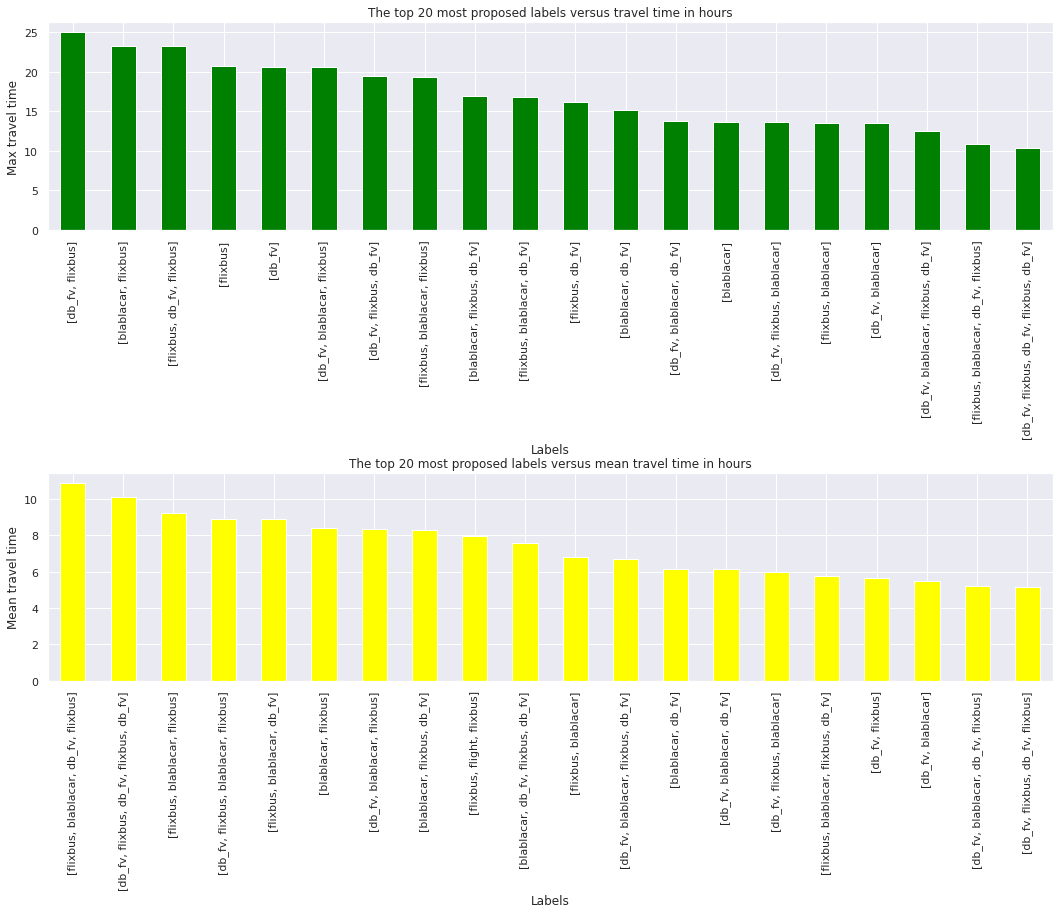

In [ ]:
#display the top twenty labels by max travel time for a common dataset
most_popular_labels=df4.groupby("finalsolutionusedlabels")["totaltraveltimeinsec"].agg("max").sort_values(ascending=False).head(20)
most_popular_labels

fig, axes = plt.subplots(2,1,figsize=(15,10))


plt.subplot(211)
most_popular_labels.plot(kind='bar',color='green')#set up inner parametres
plt.xlabel("Labels", size = 12)
plt.ylabel("Max travel time", size =12)
plt.title("The top 20 most proposed labels versus travel time in hours", size = 12)

plt.tight_layout() #space

plt.subplot(212)
mean_modes = df4.groupby("finalsolutionusedlabels")["totaltraveltimeinsec"].agg("mean").sort_values(ascending=False).head(20) #group by aggregated mean in descending order
mean_modes.sort_values(ascending=False).plot(kind = "bar",color='yellow') #sort the values in descending order
plt.xlabel("Labels", size = 12)
plt.ylabel("Mean travel time", size = 12)
plt.title("The top 20 most proposed labels versus mean travel time in hours", size = 12)

1st picture- the top 3 popular labels are train, train+bus, bus+train+bus, 2d picture-The ranking of labels have changed when using mean price,the top 3 became train+bus+train+bus+train, bus+flight+bus, bus+flight+train

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


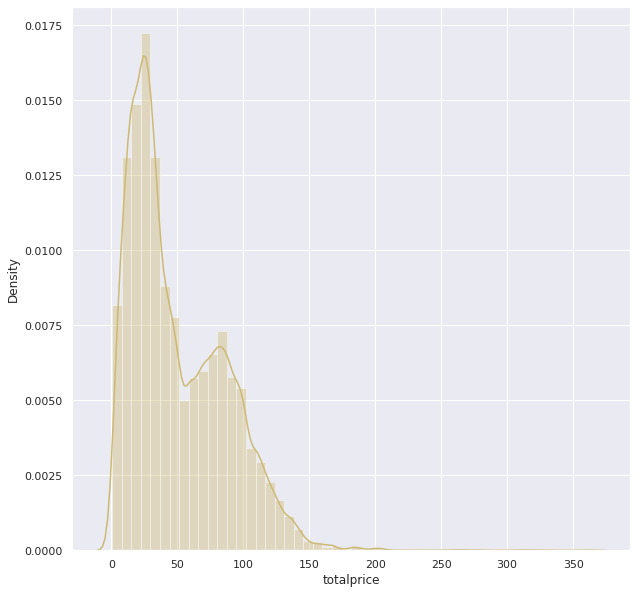

In [ ]:
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df4['totalprice'], color='y') #yellow for the nerged ds

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


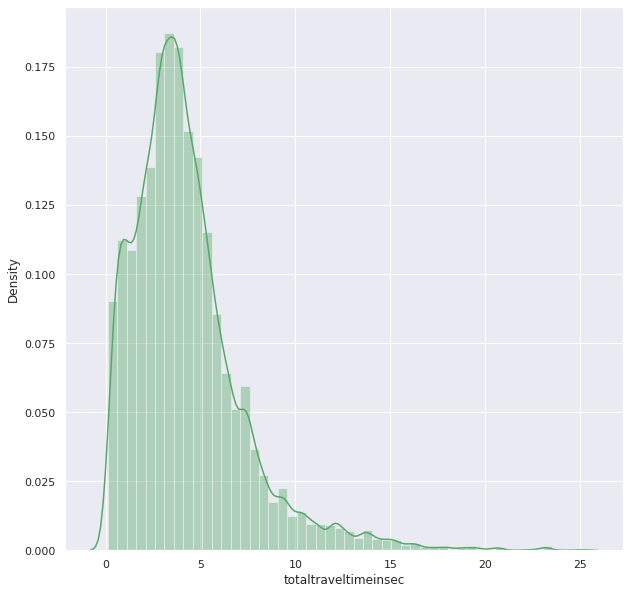

In [ ]:
sns.set(color_codes=True) 
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df4['totaltraveltimeinsec'], color='g')


the distribution was not biased by merging

In [ ]:
#copy of dataset for further processing
df5=df4.copy()

In [ ]:
#separate the values which are the nulls and 0-s
def process_dataset(data):
  data['define_value_numberOfChanges'] = "null"
  data['define_value_walkingDistance'] = "null"
  data['define_value_waitingTime'] = "null"
  for i in range(0, len(data)):
    if "numberofChanges" in data['consideredpreferences'].values[i]:
      if data["totalnumberofchanges"].values[i] == 0:
        data["define_value_numberOfChanges"].values[i] = 0
      else:
        data["define_value_numberOfChanges"].values[i] = data["totalnumberofchanges"].values[i]
    else:
      data["define_value_numberOfChanges"].values[i] = None

    if "walkingDistance" in data['consideredpreferences'].values[i]:
      if data["totalwalkingdistance"].values[i] == 0:
        data["define_value_walkingDistance"].values[i] = 0
      else:
        data["define_value_walkingDistance"].values[i] = data["totalwalkingdistance"].values[i]
    else:
      data["define_value_walkingDistance"].values[i] = None

    if "waitingTime" in data['consideredpreferences'].values[i]:
      if data["totalwaitingtime"].values[i] == 0:
        data["define_value_waitingTime"].values[i] = 0
      else:
        data["define_value_waitingTime"].values[i] = data["totalwaitingtime"].values[i]
    else:
      data["define_value_waitingTime"].values[i] = None
      
  return data

datanew = process_dataset(df5)
datanew

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,None,None,None
1,1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,None,None,None
2,2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,None,None,None
3,3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,None,None,None
4,4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,75149,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.68
85149,75150,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,1.53
85150,75166,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25
85151,75173,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25


3 new columns were created to investigate the anomalies per real 0s for trabsfers, distance and waiting time and other mixed values which are different from 0s in reality (here none-null)

In [ ]:
# replace none by null for plotting
datanew.fillna(value='NULL', inplace=True)
datanew


,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
1,1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
2,2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
3,3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
4,4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,75149,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.68
85149,75150,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,1.53
85150,75166,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25
85151,75173,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25


In [ ]:
#download the new file for sharing
from google.colab import files
reducenew.to_csv('newithcolumns.csv') 
files.download('newithcolumns.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

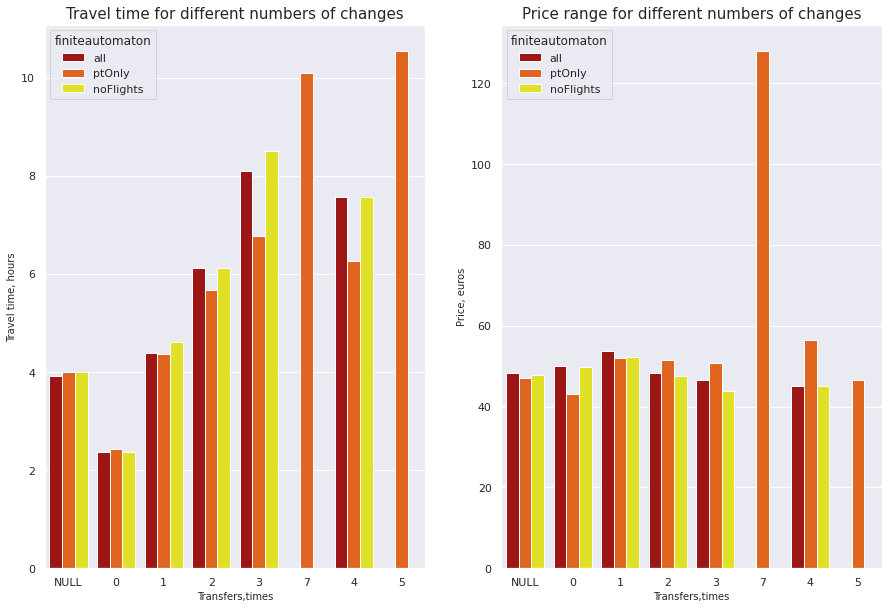

In [ ]:
def plot_data(data):
  fig, axes = plt.subplots(1, 2, figsize=(15, 10))
  #plot the differences within the tranfers with fixed values per mode type
  plt.subplot(121)
  
  sns.barplot(x=data.define_value_numberOfChanges,y=data.totaltraveltimeinsec,hue="finiteautomaton",palette="hot",data=datanew,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Transfers,times", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Travel time, hours", size = 10)
  plt.title("Travel time for different numbers of changes", size = 15)

  plt.subplot(122)

  sns.barplot(x=data.define_value_numberOfChanges,y=data.totalprice,hue="finiteautomaton",palette="hot",data=datanew,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Transfers,times", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Price, euros", size = 10)
  plt.title("Price range for different numbers of changes", size = 15)



plot_data(datanew)

Create a function for plotting the data- left graph- 5 and 7 changes are relevant for public transport only-the time is the highest, direct transportation correspond equally to all mode types, normally happening within 1 day (<24 hours), having 4 transfers you save your travel time than having 3 transfers

right graph-  the highest price again is for 7 changes-more than 2 times higher, normally the price is below 60 euros for all except 7 changes, having 1 transfer price is slightly higher than having direct transportation.

Overall-considering the NULL value, we cant detect any outstanding result, there could be any number of transfers included, we do not assume that high frequency of changes is included. the price is not higher in general when having 1 transfer

In [ ]:
#for the walking distance
wd=datanew.copy()
wd

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
1,1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
2,2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
3,3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
4,4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,75149,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.68
85149,75150,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,1.53
85150,75166,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25
85151,75173,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25


In [ ]:
#get rid of unknown observations
def reduce_null(data):
  data.drop(data.loc[data['define_value_walkingDistance']== 'NULL'].index, inplace=True) #for 2 columns
  #data.drop(data.loc[data['define_value_waitingTime']== 'NULL'].index, inplace=True)

  return data

reduce_null(wd)


,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
40,40,0.39,0.86,0,0.300,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,NULL
41,41,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,NULL
42,42,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,NULL
43,43,0.39,0.86,0,0.300,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,NULL
44,44,0.25,3.83,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[car],Essen,Gelsenkirchen,0,0,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,75149,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.68
85149,75150,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,1.53
85150,75166,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25
85151,75173,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25


To prepare for the numerical binning-we exclude none values and consider only real transfers that we know precisely, since we have many unique values per waiting time and distance

In [ ]:
#for waiting time
wt=datanew.copy()
wt

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
1,1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
2,2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
3,3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
4,4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,75149,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.68
85149,75150,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,1.53
85150,75166,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25
85151,75173,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25


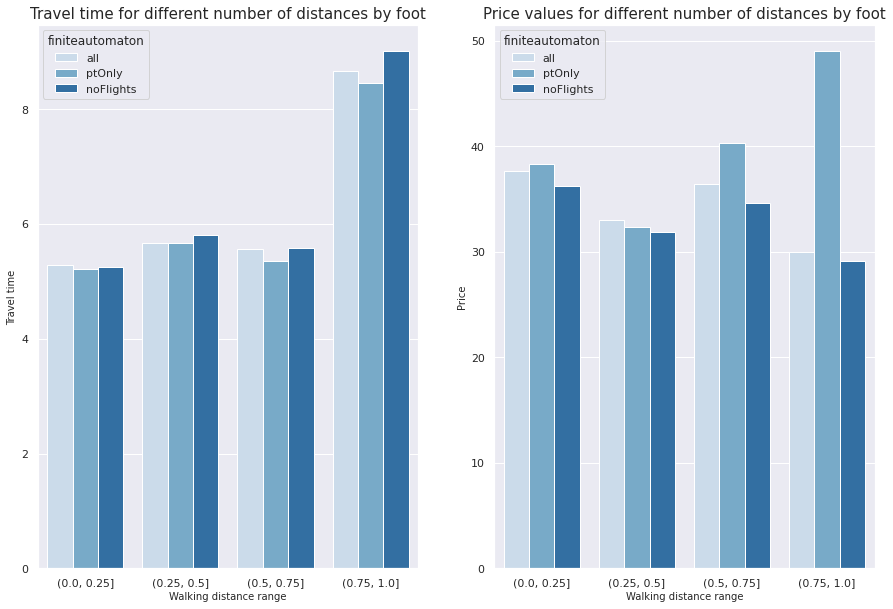

In [ ]:
def plot_d(data):
#plot with binning for many numerical values
  fig, axes = plt.subplots(1, 2, figsize=(15, 10))
  
  plt.subplot(121)
  data['bin'] = pd.cut(data['define_value_walkingDistance'], bins = [0,0.25,0.5,0.75,1])
                       
  sns.barplot(x=data['bin'],y=data.totaltraveltimeinsec,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  #x=data.define_value_walkingDistance
  plt.xlabel("Walking distance range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Travel time", size = 10)
  plt.title("Travel time for different number of distances by foot", size = 15)


  plt.subplot(122)
  data['bin'] = pd.cut(data['define_value_walkingDistance'], bins = [0,0.25,0.5,0.75,1])
  sns.barplot(x=data['bin'],y=data.totalprice,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Walking distance range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Price", size = 10)
  plt.title("Price values for different number of distances by foot", size = 15)


plot_d(wd)


 left graph-the highest walking distance corresponds to the highest travel time, normally mode of noFlights increases travel time and walking distance, distance between 0,2-0,5 matches with the higher travel time than distance by foot from 0,5 to 0,7

 right graph- #the highest price is for use of PT having the walking distance from 0,75 to 1, could be an anomaly, other modes as all and noflights within this range are lower in prices with the longest distance to overcome by foot

In [ ]:
#exclude null data to proceed with binning for the waiting time 
def reduce_nul(data):
  #data.drop(data.loc[data['define_value_walkingDistance']== 'NULL'].index, inplace=True)
  data.drop(data.loc[data['define_value_waitingTime']== 'NULL'].index, inplace=True)#for the second column

  return data

reduce_nul(wt)


,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
77,77,0.39,0.86,0,0.300,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,0
78,78,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,0
79,79,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,0
80,80,0.39,0.86,0,0.300,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,0
81,81,0.25,3.83,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[car],Essen,Gelsenkirchen,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,75149,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.68
85149,75150,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,1.53
85150,75166,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25
85151,75173,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,0.25


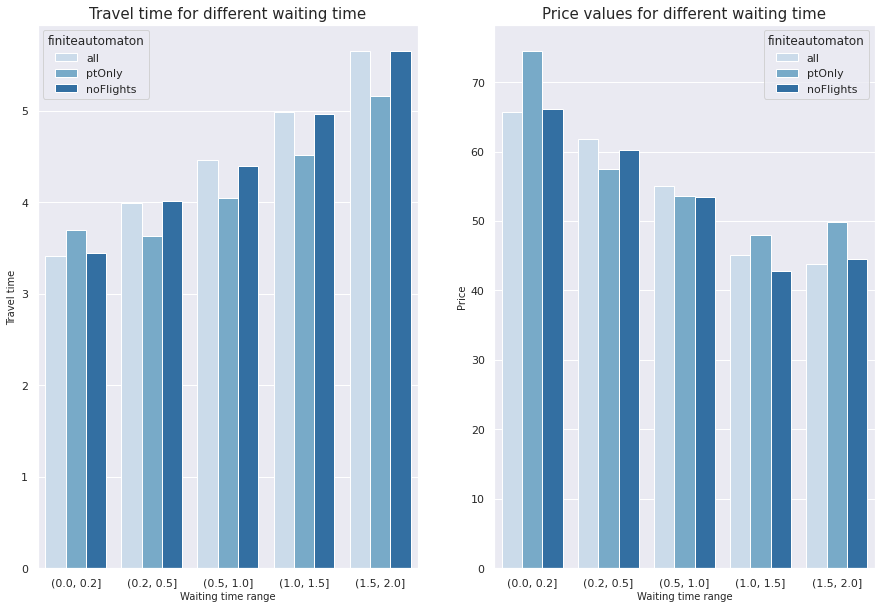

In [ ]:
def plot(data):
 #plot 1st graph wrt to waiting time column
  fig, axes = plt.subplots(1, 2, figsize=(15, 10))
  
  plt.subplot(121)
  data['bin'] = pd.cut(data['define_value_waitingTime'], bins = [0,0.2,0.5,1,1.5,2])
                       #range(0,1,0.5), labels=[f'{l}-{l+0.5}' for l in range(0,0.5,0.5)])
  sns.barplot(x=data['bin'],y=data.totaltraveltimeinsec,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  #x=data.define_value_walkingDistance
  plt.xlabel("Waiting time range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Travel time", size = 10)
  plt.title("Travel time for different waiting time", size = 15)

#plot second graph
  plt.subplot(122)
  data['bin'] = pd.cut(data['define_value_waitingTime'], bins = [0,0.2,0.5,1,1.5,2])
  sns.barplot(x=data['bin'],y=data.totalprice,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Waiting time range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Price", size = 10)
  plt.title("Price values for different waiting time", size = 15)




plot(wt)

left picture-  the more waiting time we have- the more travel time would it be for the trip, all transport are the leads from the mode perspective

right picture- if the cutimers do not want to wait a lot-the price would be significantly higher, its easy to follow the pattern-more time to wait-less money to pay (especially with the public transport)

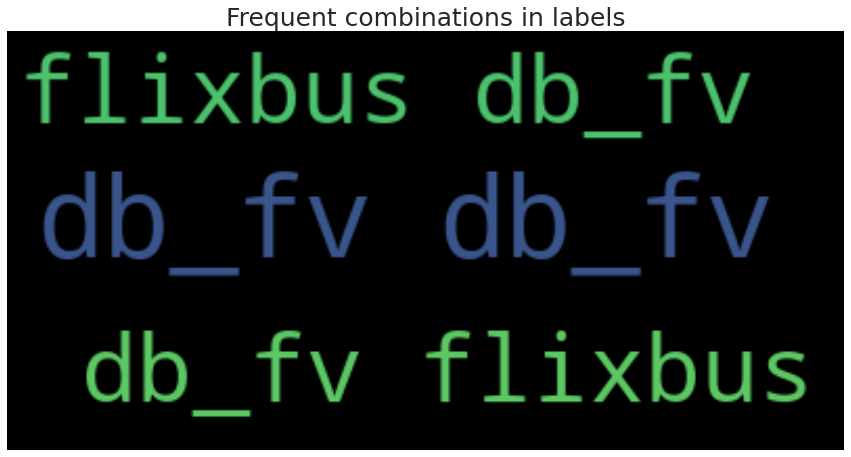

In [ ]:
#for the sake of exploratory analysis -investigate the frequency of the proposed solutions
from wordcloud import WordCloud
#join each element of the column name in our dataset
txt =" ".join(str(each) for each in df4.finalsolutionusedlabels)
# create and generate a word cloud image, set a max range of words-top 2
name_wordcloud = WordCloud(max_words=3, background_color="black").generate(txt)
plt.figure(figsize=(15,10))
#display the generated image:
#nn bilinear interpolation, a linear interpolation is first performed between pixels in the horizontal (X) direction of the image and then in the Y direction (or vice-versa)
plt.imshow(name_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Frequent combinations in labels',size = 25) #set the figure size
plt.show()


The most proposed mode of travel is land-based and includes flixbus or rail transportation, which was also detected previously via other samples

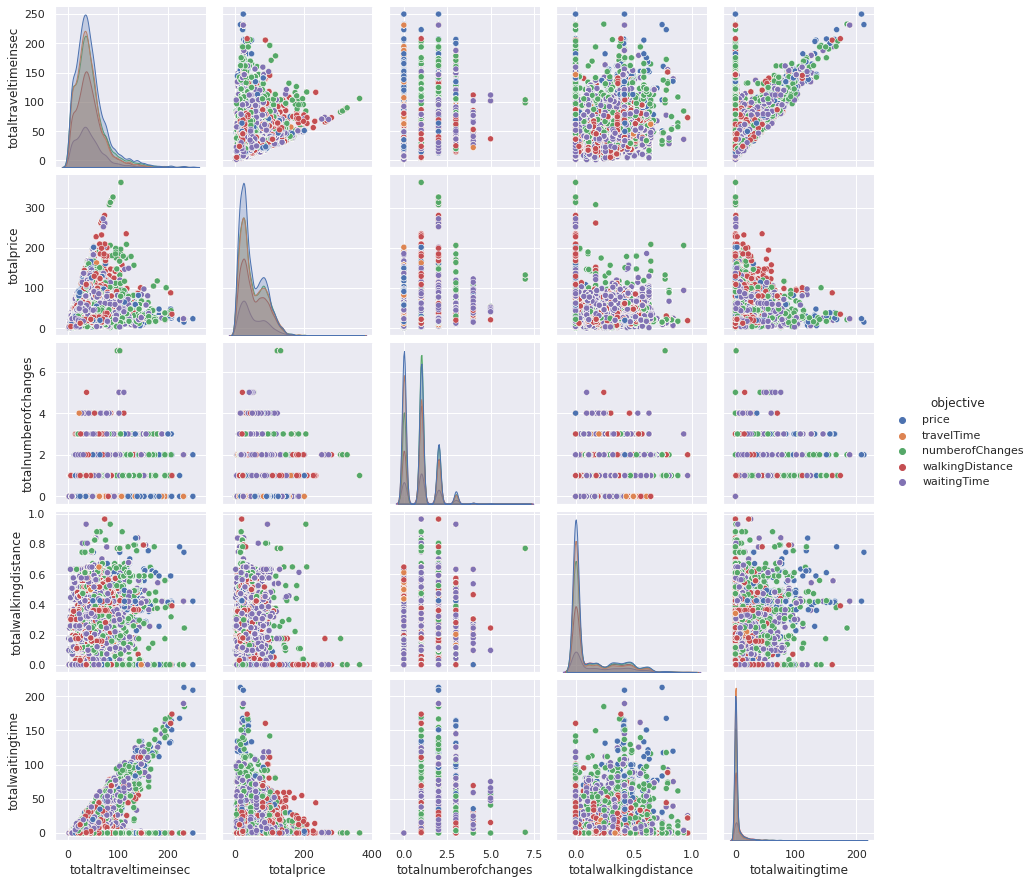

In [ ]:
#get the pairplot to understand the a relationship between two variables 
#determine the color for different mode choices in general

df4 = df4.reset_index(drop=True)
sns.pairplot(df4,vars=['totaltraveltimeinsec','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime'],hue='objective')


Could highlight strong positive correlation between waiting and total time, could evaluate how our objective works

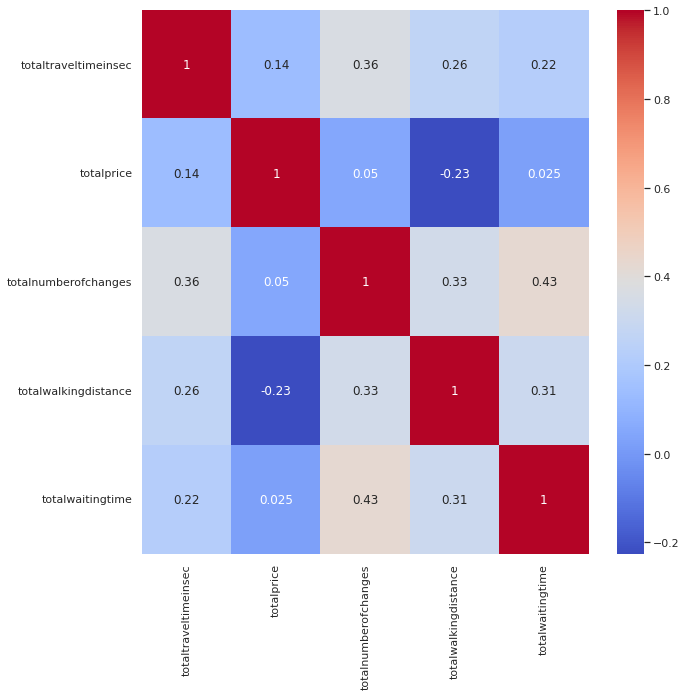

In [ ]:
#build the correlation matrix for total price and other numerical columns to see how high the correlation would be

selected = df4[['totaltraveltimeinsec','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime']] #pick the columns
show=selected.corr(method='kendall') #compute pairwise correlation
plt.figure(figsize=(10,10))
sns.heatmap(show,annot=True,cmap='coolwarm')



Reference:https://www.statisticssolutions.com/pearsons-correlation-coefficient/

meaning of correlation number

Perfect: If the value is near ± 1, then it said to be a perfect correlation

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

Low degree: When the value lies below ± 0.29, then it is said to be a small correlation.

No correlation: When the value is zero.


conclusion for this part: strong moderate correlation for transfers and waiting time=> more changes more time to wait, travel time in total and transfers, low degree of correlation for price and travel time!!,negative correlation (still small) between walking distance and price, if the price is higher-distance to cover by foot is lower

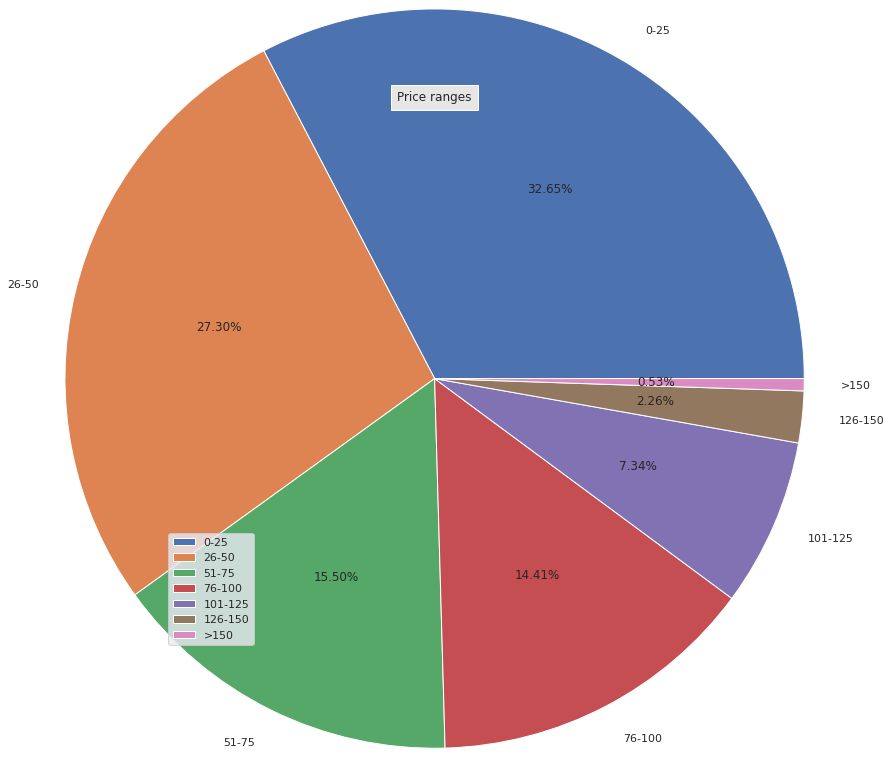

49.75690815355889

In [ ]:
#plot the pie chart for merget df


data_price4 = df4[:] #slice for every element
data_price4["totalprice"] = data_price4["totalprice"].astype(int) #specify the column and dtype we need
bins = [0,25,50,75,100,125,150,200] #create a list of bins
labels = ['0-25','26-50','51-75','76-100','101-125', '126-150', '>150'] #create the list of labels
data_price4['totalprice_cat'] = pd.cut(data_price4["totalprice"], bins=bins, labels=labels) #bin values into discrete intervals
data_price4.head()
plt.figure(figsize=(10,10)) 

#count and enter percentages inside the shape
plt.pie(data_price4['totalprice_cat'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.7)#parametres
plt.legend(loc="lower left") #location of the figure
plt.title("Price ranges", bbox={'facecolor':'0.9', 'pad':6}, loc = "center")#play with the title
plt.show()



data_price4["totalprice"].mean()


On average the price would be 49,75 euros,the most common range for price in dataset3 is also below 25 euros

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


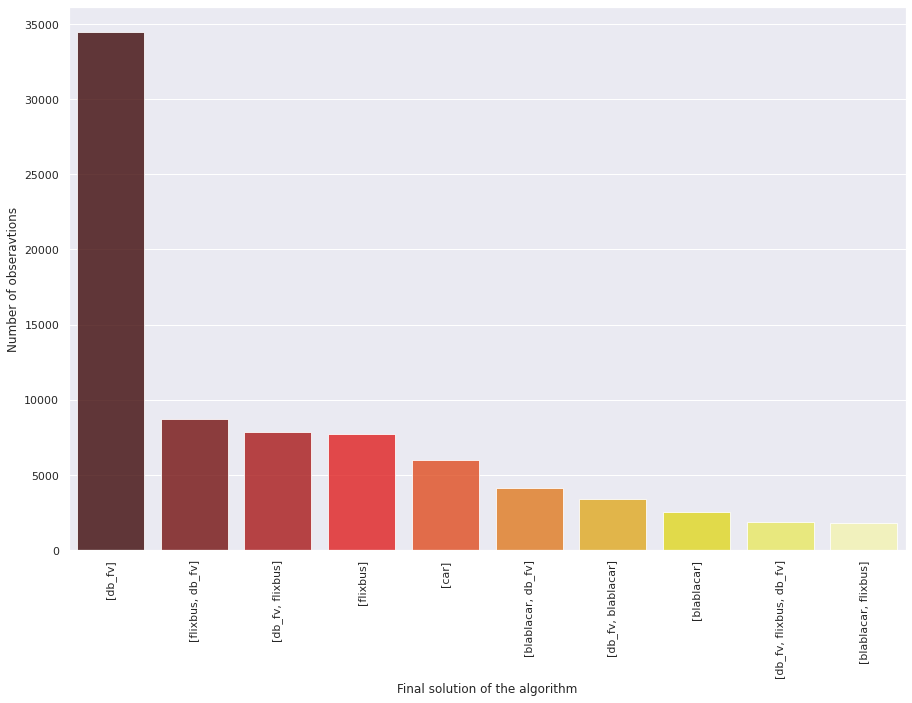

In [ ]:
# Plot Top 10 combinations based on number of observations for the merged file

cnt_srs = df4['finalsolutionusedlabels'].value_counts().nlargest(10)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Final solution of the algorithm', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

train, train+bus and bus+train-top 3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


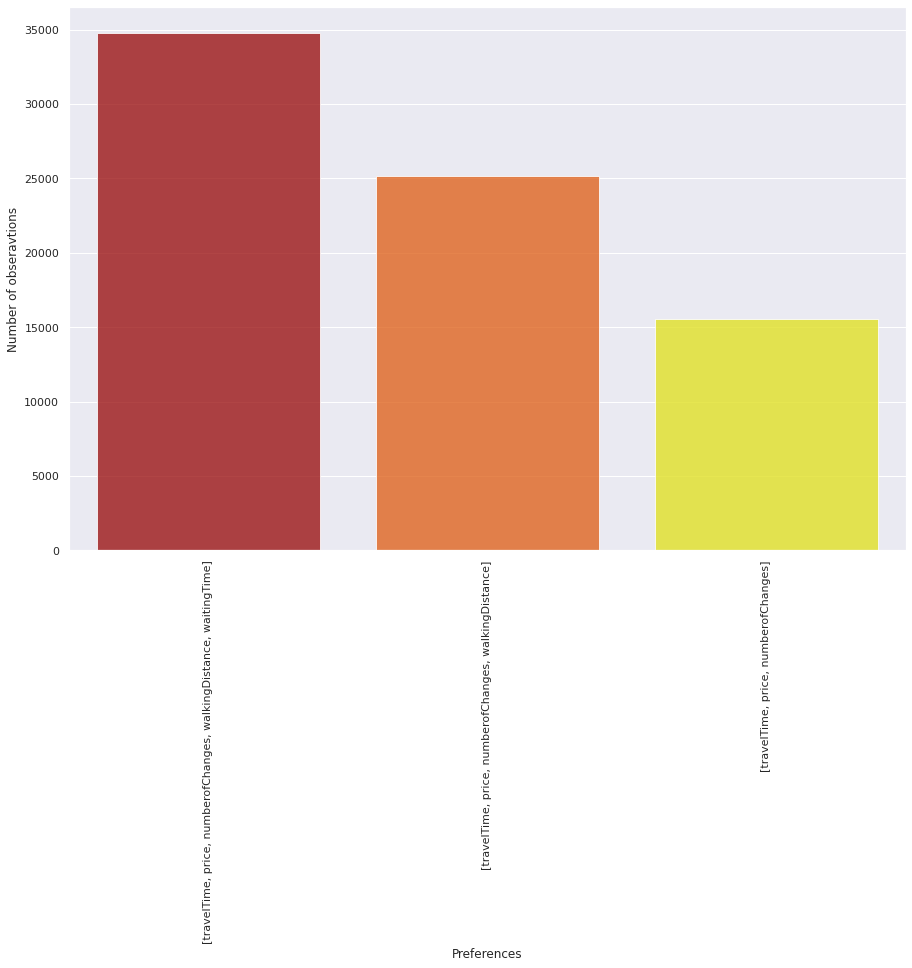

In [ ]:
# Plot Top 3 combinations based on number of preferences for the merged

cnt_srs = df4['consideredpreferences'].value_counts().nlargest(3)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Preferences', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

The lead combination is having al preferences inside- 35000 observations, having only price and time the less common one

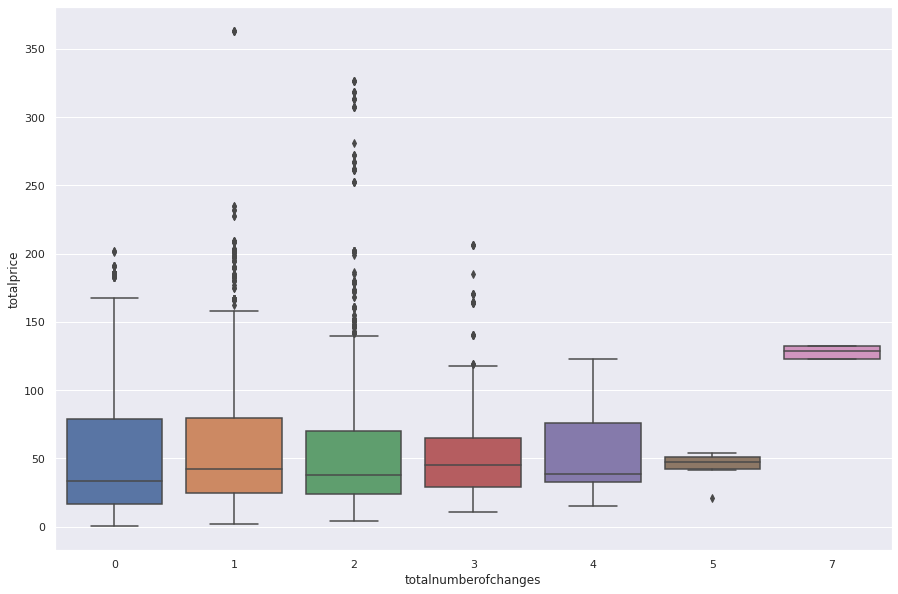

In [ ]:
#plot number of transfers per price

plt.figure(figsize=(15,10))
sns.boxplot(x='totalnumberofchanges',y='totalprice',data=df4.sort_values('totalprice',ascending=False))

Check the outliers with the dots,price for 0 transfers (null or 0) is slightly greater than for 1 and 2 in general,mostly distributed between 0 and 165 euros, the prices which are higher 165 we could consider them as the outliers, 7 differenet options including 0 as null, we do not have 6 transfers, have only 5 and 7 then

In [ ]:
reduce=df4.copy()
#dropping the outliers of price using IQR method-interquartile range 


q1 = reduce['totalprice'].quantile(0.25)
q3 = reduce['totalprice'].quantile(0.75)
iqr = q3 - q1     

#some extreme data values have been removed
filter = (reduce['totalprice'] >= (q1 - 1.5 * iqr)) & (reduce['totalprice'] <= (q3 + 1.5 *iqr))
reducenew=reduce.loc[filter]#filtering the data

reducenew.head(10)

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,0,0.39,0.86,0,0.0,0.0,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,1,0.13,2.17,0,0.0,0.0,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,2,0.13,2.17,0,0.0,0.0,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,3,0.39,0.86,0,0.0,0.0,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,4,0.39,0.86,0,0.0,0.0,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
5,5,0.13,2.17,0,0.0,0.0,price,ptOnly,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
6,6,0.13,2.89,0,0.0,0.0,travelTime,ptOnly,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
7,7,0.13,2.17,0,0.0,0.0,travelTime,ptOnly,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
8,8,0.39,0.86,0,0.0,0.0,travelTime,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
9,9,0.39,0.86,0,0.0,0.0,price,noFlights,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen


Statistically, it is assumesd that the values are clustered around some central value, i.e. IQR = Q3 – Q1, if a data point is below Q1 – 1.5×IQR or above Q3 + 1.5×IQR, it is considered as being too far from the central values

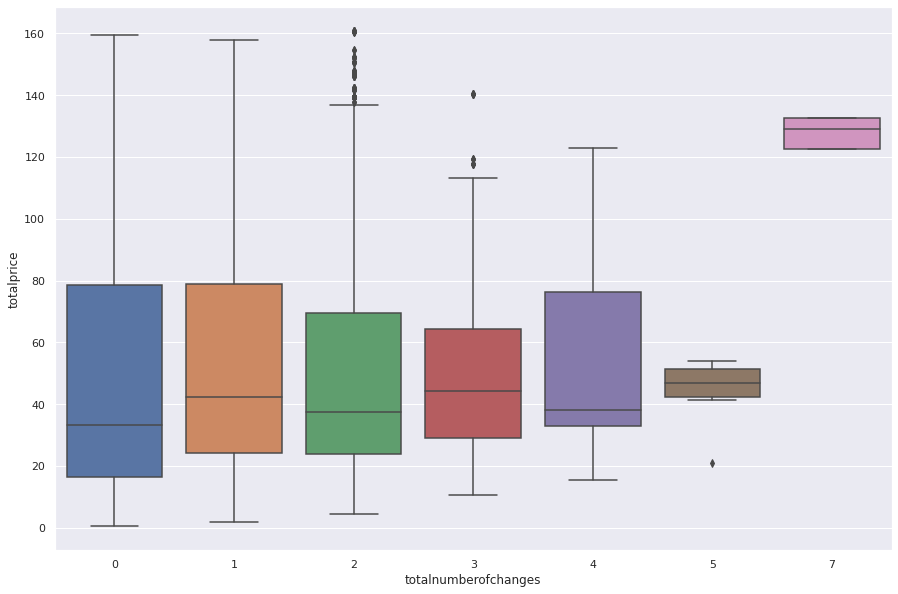

In [ ]:
#plot updated number of transfers per price

plt.figure(figsize=(15,10))
sns.boxplot(x='totalnumberofchanges',y='totalprice',data=reducenew.sort_values('totalprice',ascending=False))

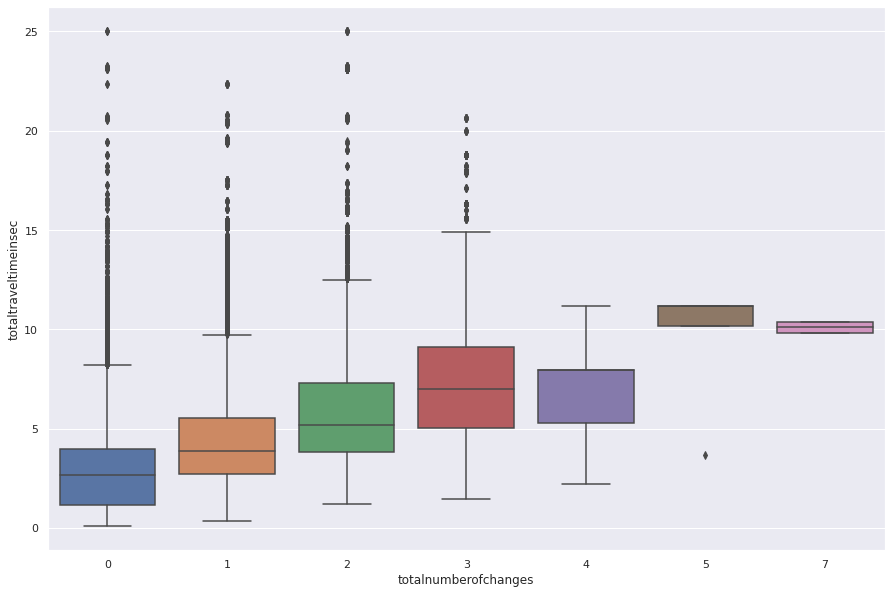

In [ ]:
#number of transfers per travel time

plt.figure(figsize=(15,10))
sns.boxplot(x='totalnumberofchanges',y='totaltraveltimeinsec',data=df4.sort_values('totalprice',ascending=False))

25 hours for 0 and 2 transfers, having 5 and 7 transfers the time is quicker, would drop them for some alghorithms

In [ ]:
#dropping the outliers of travel time using IQR method-interquartile range 


q1 = reduce['totaltraveltimeinsec'].quantile(0.25)
q3 = reduce['totaltraveltimeinsec'].quantile(0.75)
iqr = q3 - q1     

#some extreme data values have been removed
filter = (reduce['totaltraveltimeinsec'] >= (q1 - 1.5 * iqr)) & (reduce['totaltraveltimeinsec'] <= (q3 + 1.5 *iqr))
reducenew=reduce.loc[filter]#filtering the data

reducenew.head(10)

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,0,0.39,0.86,0,0.0,0.0,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,1,0.13,2.17,0,0.0,0.0,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,2,0.13,2.17,0,0.0,0.0,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,3,0.39,0.86,0,0.0,0.0,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,4,0.39,0.86,0,0.0,0.0,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
5,5,0.13,2.17,0,0.0,0.0,price,ptOnly,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
6,6,0.13,2.89,0,0.0,0.0,travelTime,ptOnly,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
7,7,0.13,2.17,0,0.0,0.0,travelTime,ptOnly,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
8,8,0.39,0.86,0,0.0,0.0,travelTime,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
9,9,0.39,0.86,0,0.0,0.0,price,noFlights,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen


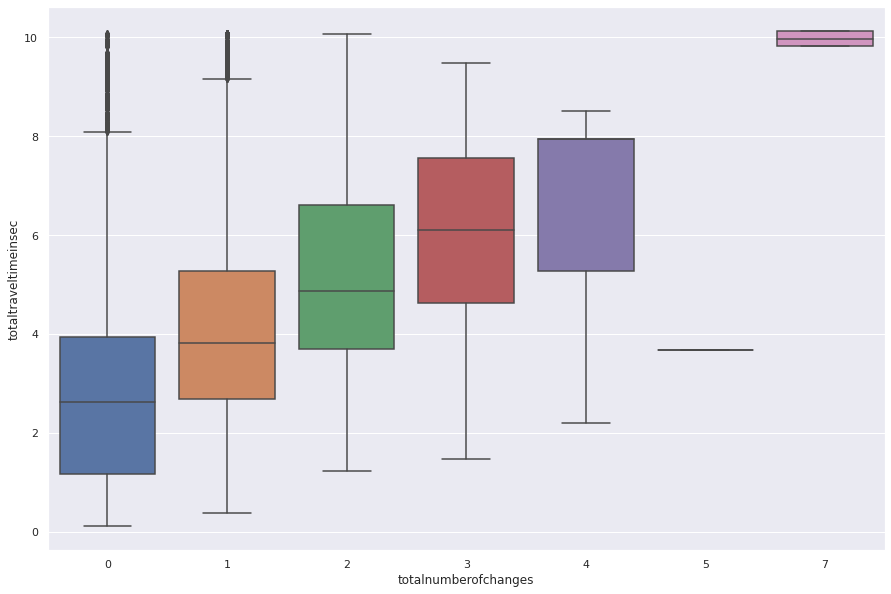

In [ ]:
#graph after applying IQR

plt.figure(figsize=(15,10))
sns.boxplot(x='totalnumberofchanges',y='totaltraveltimeinsec',data=reducenew.sort_values('totaltraveltimeinsec',ascending=False))

got shrinked to 10 hours

In [ ]:
reducenew # the df with reduced outliers for prica and travel time

,index,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,0,0.39,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,1,0.13,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,2,0.13,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,3,0.39,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,4,0.39,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
...,...,...,...,...,...,...,...,...,...,...,...,...
85148,75149,5.17,91.20,1,0.000,0.68,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
85149,75150,6.13,86.04,1,0.000,1.53,waitingTime,ptOnly,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
85150,75166,4.54,22.47,1,0.177,0.25,numberofChanges,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
85151,75173,4.54,22.47,1,0.177,0.25,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


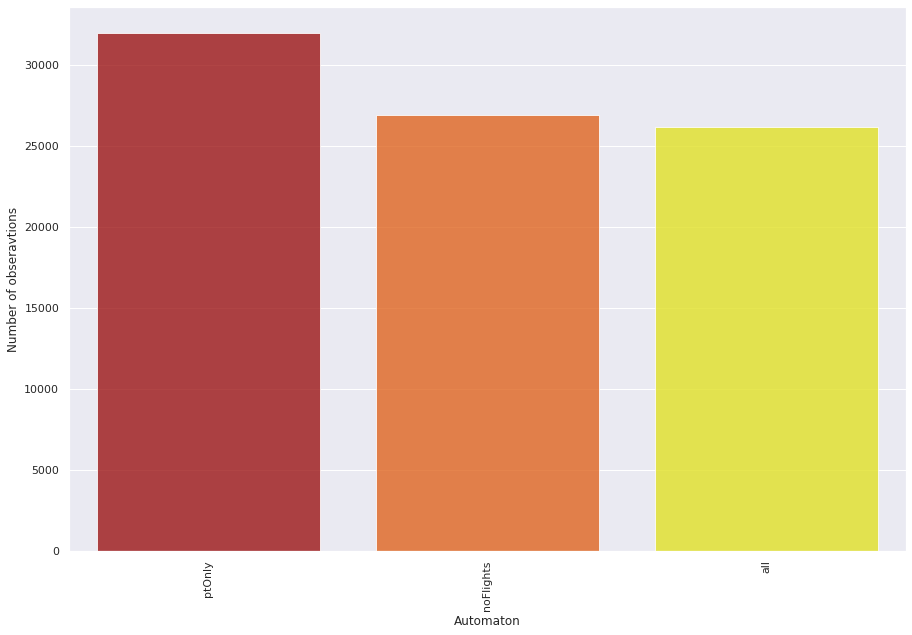

In [ ]:
# Plot Top 3 combinations based on finiteautomaton

cnt_srs = df4['finiteautomaton'].value_counts().nlargest(3)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Automaton', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

Public transport only mode is involved at most for almost 33 000 observations of full dataset

Text(0.5, 1.0, 'Distribution of prices per number of changes ')

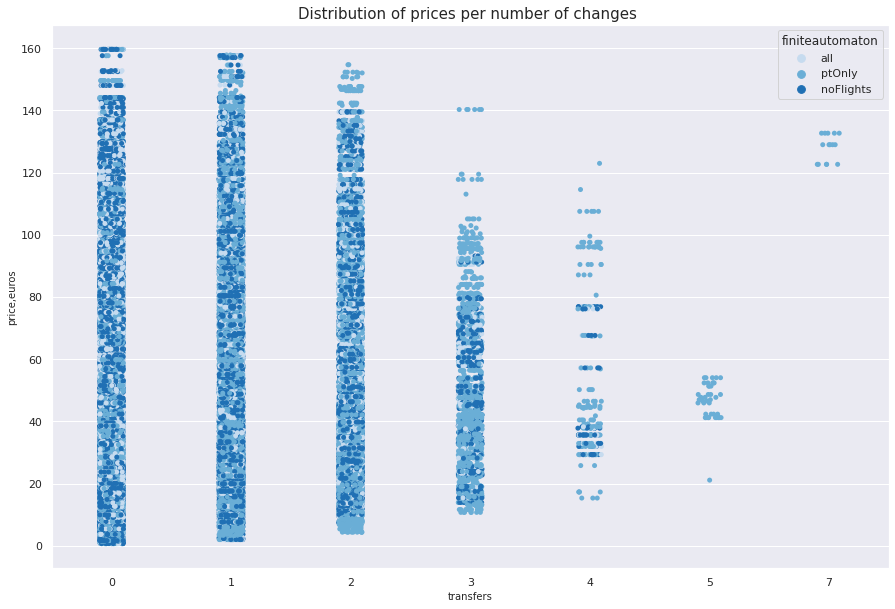

In [ ]:
#investigate deeper in the transfer distribution when the price is less than 160 euros
#for the combined dataset

plt.figure(figsize=(15, 10))
sns.stripplot(data=df4,x=df4.totalnumberofchanges[df4['totalprice']<160]#set an interval
              ,y='totalprice', hue="finiteautomaton",palette='Blues') #configure the axis
plt.xlabel("transfers", size = 10)
plt.ylabel("price,euros", size = 10)
plt.title('Distribution of prices per number of changes ',fontsize=15)


Found out that the price is slightly higher having 0 transfers other, for 0-1 transfer the mode of noFlights is dominative one, especially when the price is high, for 2-7 transfers higher price relates to public transport choice mostly

In [ ]:
#evaluated correlation between 2 categorical variables pairwise

import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(df4.finiteautomaton,df4.consideredpreferences)


0.0409578917501821

Cramers V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive), based on Pearson's chi-squared statistic ,no direct association between finite automation and considered preferences

In [ ]:
#no direct association
cramers_v(df4.finiteautomaton,df4.finalsolutionusedlabels)


0.15629295264861107

In [ ]:
#check
cramers_v(df4.objective,df4.finalsolutionusedlabels)

0.05709085075041991

The association is low, would drop the column objective for clustering

In [ ]:
cramers_v(df4.consideredpreferences,df4.finalsolutionusedlabels)

0.07897990963843367

In [ ]:
cramers_v(df4.sourcename,df4.finalsolutionusedlabels)

0.1802066058739973

In [ ]:
cramers_v(df4.targetname,df4.finalsolutionusedlabels)

0.16994806029121146